In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Loading the cleaned dataset
try:
    df = pd.read_csv('cleaned_data.csv')
    print('The Data is loaded successfully')
except FileNotFoundError:
    raise FileNotFoundError('Error: cleaned_data.csv not found. Check the file path for it.')

# Checking for required columns
required_cols = ['text', 'timestamp', 'rating', 'brand', 'main_category']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f" Missing required columns: {missing}")


# Derived fields using confirmed column names
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['year'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce').dt.year

# Set visualization style
sns.set(style="whitegrid")


The Data is loaded successfully


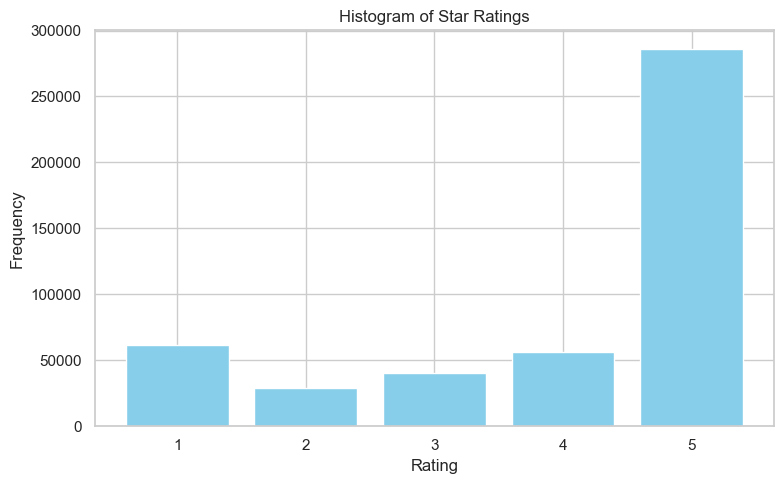

In [19]:
# Star Rating Histogram
plt.figure(figsize=(8, 5))
df['rating'].plot(kind='hist', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth=0.8, color='skyblue')
plt.title("Histogram of Star Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

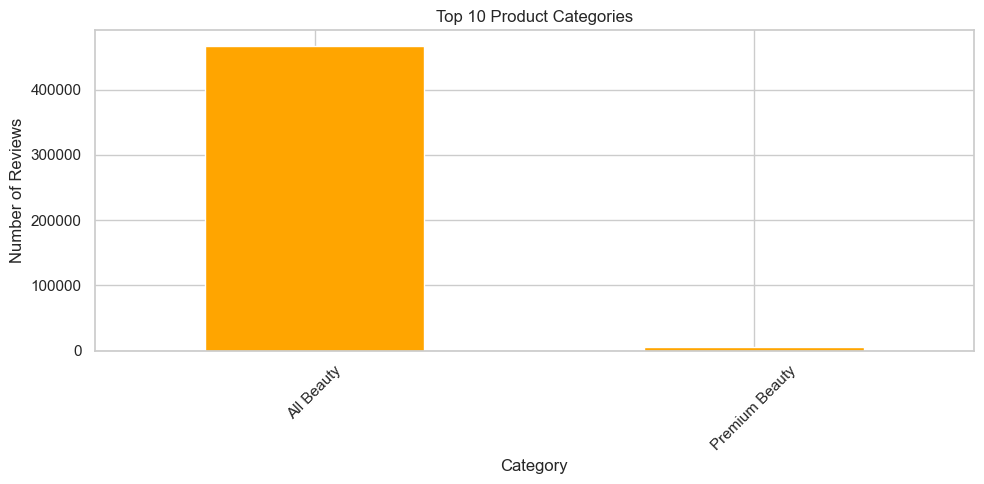

In [20]:
# Review Count
top_categories = df['main_category'].value_counts().head(10) 
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='orange')
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

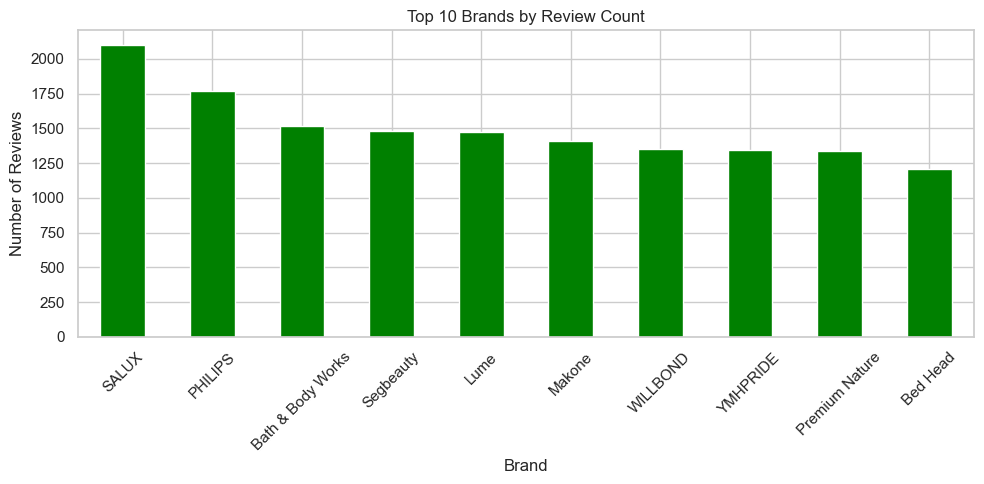

In [21]:
# Top 10 Brands by Review Count (i'm excluding 'Unknown')
top_brands = df[df['brand'] != "Unknown"]['brand'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_brands.plot(kind='bar', color='green')
plt.title("Top 10 Brands by Review Count")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

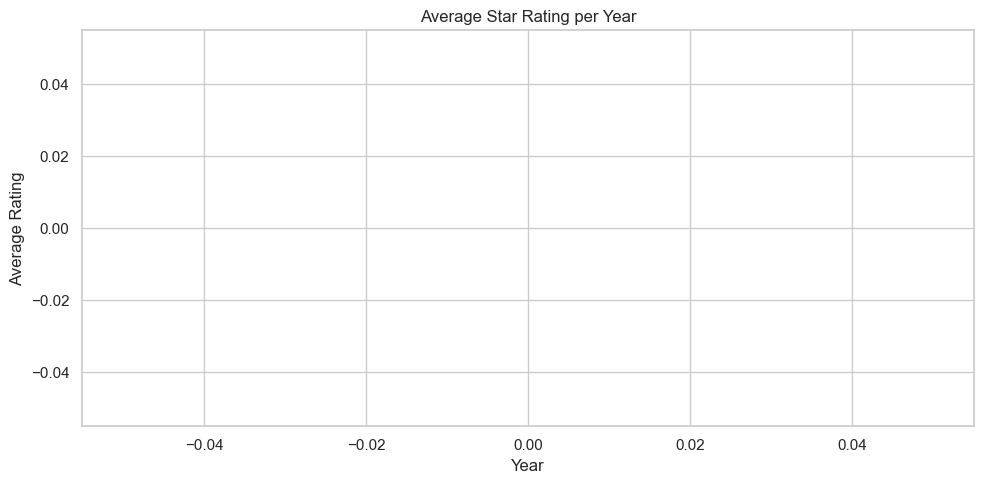

In [22]:
# Average Rating per Year (Line Chart)
yearly_avg = df.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 5))
yearly_avg.plot(marker='o', color='purple')
plt.title("Average Star Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Pearson Correlation: Review Length vs Rating
corr_value, p_value = pearsonr(df['review_length'], df['rating'])
print(f" Pearson Correlation (review length vs rating): {corr_value:.4f} (p = {p_value:.4e})")

 Pearson Correlation (review length vs rating): -0.0217 (p = 1.7077e-50)


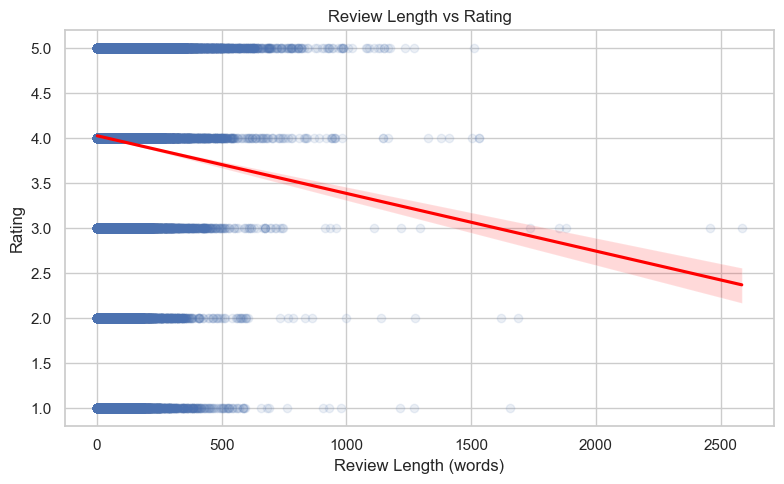

In [24]:
# Optional: Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.regplot(x='review_length', y='rating', data=df, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

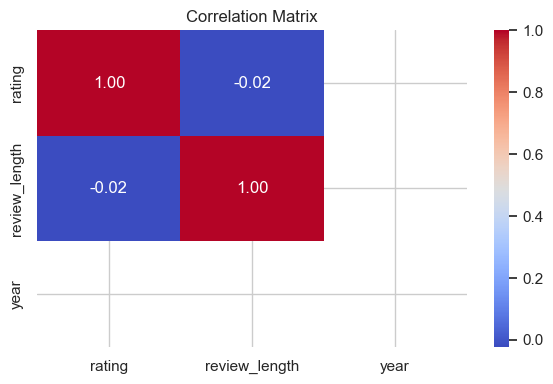

In [25]:
# Correlation Matrix
corr = df[['rating', 'review_length', 'year']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [26]:
# Outlier Detection using IQR for review length
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
iqr_value = Q3 - Q1
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
print(f" Outliers in review_length: {len(outliers)}")


 Outliers in review_length: 35370


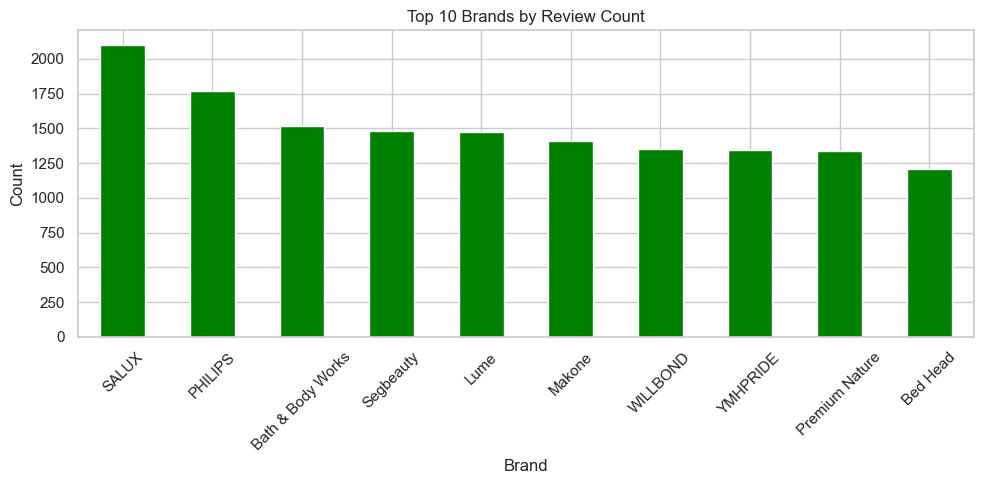

In [27]:
# Reviews Per Year
top_brands = df[df['brand'] != 'Unknown']['brand'].value_counts().head(10)

if not top_brands.empty:
    plt.figure(figsize=(10, 5))
    top_brands.plot(kind='bar', color='green')
    plt.title('Top 10 Brands by Review Count')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No brand data is available for plotting right now.")


In [28]:
# Grouped Summary Statistics for Ratings by Category
category_summary = df.groupby('main_category')['rating'].describe().sort_values(by='count', ascending=False)
print("Detailed Rating Stats per Category:")
display(category_summary.head(10))  


Detailed Rating Stats per Category:


,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
All Beauty,467347.0,4.006169,1.451683,1.0,3.0,5.0,5.0,5.0
Premium Beauty,5059.0,4.063254,1.421865,1.0,3.0,5.0,5.0,5.0


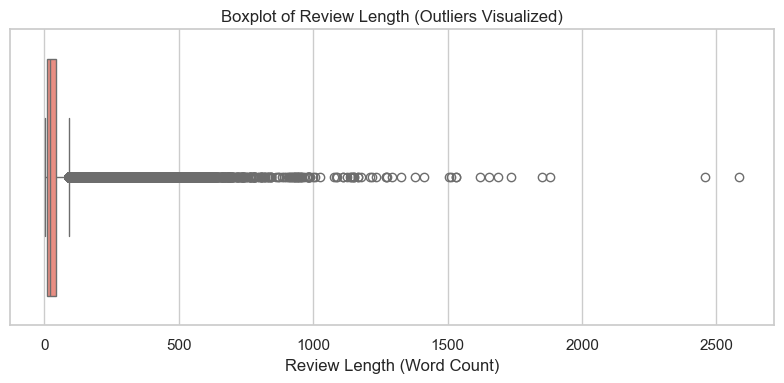

In [29]:
# Boxplot to Visualize Outliers in Review Length
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['review_length'], color='salmon')
plt.title("Boxplot of Review Length (Outliers Visualized)")
plt.xlabel("Review Length (Word Count)")
plt.tight_layout()
plt.show()
